In [4]:
import pandas as pd
lit_df = pd.read_csv("data/literatur.tsv", sep="\t", header=None, names=["title", "pubTitle", "volume", "entry"])
lit_map = {title: pubTitle for title, pubTitle in zip(lit_df.title, lit_df.pubTitle)}
# in der edition so angegeben:
lit_map["ASD"] = lit_map["ASD (Erasmus)"]
lit_map["BZD"] = lit_map["BZD (Vischer, BZD)"]
lit_df

,title,pubTitle,volume,entry
0,"A Lasco, Opera",Opera tam edita quam inedita,NaN,"Johannes a Lasco, Opera tam edita quam inedita, hg. v. Abraham Kuyper, 2 Bde., Amsterdam-Den Haag 1866."
1,ABaslerRef,Aktensammlung zur Geschichte der Basler Reformation in den Jahren 1519 bis Anfang 1534,NaN,"Aktensammlung zur Geschichte der Basler Reformation in den Jahren 1519 bis Anfang 1534, hg. v. Emil Dürr und Paul Roth, 6 Bde., Basel 1921-1950."
2,ABernerRef,Aktensammlung zur Geschichte der Berner Reformation 1521-1532,NaN,"Aktensammlung zur Geschichte der Berner Reformation 1521-1532, hg. v. Rudolf Steck und Gustav Tobler, 2 Bde., Bern 1923."
3,ACO,Acta Conciliorum Oecumenicorum,NaN,"Acta Conciliorum Oecumenicorum, hg. v. Eduard Schwartz, 4 Bde., Berlin 1914-1984; Serie 2, Berlin 1984ff."
4,ADB,Allgemeine Deutsche Biographie,NaN,"Allgemeine Deutsche Biographie, 55 Bde., Leipzig 1875-1910; Registerband, München/Leipzig 1912."
...,...,...,...,...
713,Zwa,Zwingliana,NaN,"Zwingliana. Mitteilungen zur Geschichte Zwinglis und der Reformation (ab 1934: Beiträge zur Geschichte Zwinglis, der Reformation und des Protestantismus in der Schweiz; ab 2010: Beiträge zur Geschichte des Protestantismus in der Schweiz und seiner Ausstrahlung), Zürich 1897ff."
714,Zwingli Bibl. (Finsler),Zwingli-Bibliographie,NaN,"Georg Finsler, Zwingli-Bibliographie. Verzeichnis der gedruckten Schriften von und über Ulrich Zwingli, Zürich 1897."
715,Zürcher Kunst,Zürcher Kunst nach der Reformation. Hans Asper und seine Zeit. Katalog der Ausstellung im Helmhaus,NaN,"Zürcher Kunst nach der Reformation. Hans Asper und seine Zeit. Katalog der Ausstellung im Helmhaus, Zürich 9. Mai bis 28. Juni 1981, Zürich 1981."
716,"Zürcher, Pellikan (Zürcher)",Konrad Pellikans Wirken in Zürich 1526-1556,NaN,"Christoph Zürcher, Konrad Pellikans Wirken in Zürich 1526-1556, Zürich 1975 - ZBRG 4."


In [7]:
pd.set_option('display.max_colwidth', None)  # show whole text in the cells
footnote_df = pd.read_csv("data/footnote_df_test.csv")
footnote_df.head()

,letter_id,edition,n_footnote,n_sentence,xml_footnote,xml_sentence,text_footnote,text_sentence,len_footnote,pos_footnote,label
0,10013,20,3,2,"<persName xmlns=""http://www.tei-c.org/ns/1.0"" ref=""p9709"" cert=""high"">Wolfgang Joner, gen. R&#252;plin</persName>, Abt des Zisterzienserklosters Kappel am Albis. - Er gr&#252;ndete die Klosterschule und ernannte am 17. Januar 1523 Bullinger zu deren Schulmeister; s. <bibl xmlns=""http://www.tei-c.org/ns/1.0"">HBBW</bibl> I <ref xmlns=""http://www.tei-c.org/ns/1.0"" target=""file10017"">[Nr. 2]</ref> 48f, Anm. 4.",Quid in hoc ęvo litteratissimo te iuvene venerando patri Volffgango Ruͤppli__3,"Wolfgang Joner, gen. Rüplin, Abt des Zisterzienserklosters Kappel am Albis. - Er gründete die Klosterschule und ernannte am 17. Januar 1523 Bullinger zu deren Schulmeister; s. HBBW I [Nr. 2] 48f, Anm. 4.",Quid in hoc ęvo litteratissimo te iuvene venerando patri Volffgango Ruͤppli__3,33,10,self_ref
1,10013,20,4,3,"Vgl. dazu etwa Bullingers Aufzeichnungen über seine Lektüre während seiner Schul- und Studienzeit sowie als Lehrer im Kloster Kappel in <bibl xmlns=""http://www.tei-c.org/ns/1.0"">HBD</bibl> 2-8.","Est profecto nihil, cui in promptu sint tot volumina a summis autoribus ędita,__4__5 ingenium, quod tibi est in numerato, ut alias taceam dotes (invidia dictis absit!) sane quam pr&#281;claras.",Vgl. dazu etwa Bullingers Aufzeichnungen über seine Lektüre während seiner Schul- und Studienzeit sowie als Lehrer im Kloster Kappel in HBD 2-8.,"Est profecto nihil, cui in promptu sint tot volumina a summis autoribus ędita,__4__5 ingenium, quod tibi est in numerato, ut alias taceam dotes (invidia dictis absit!) sane quam pręclaras.",22,12,misc
2,10013,20,5,3,= exercites.,"Est profecto nihil, cui in promptu sint tot volumina a summis autoribus ędita,__4__5",= exercites.,"Est profecto nihil, cui in promptu sint tot volumina a summis autoribus ędita,__4__5",2,12,lex
3,10013,20,6,4,"Die Rede ist hier von handschriftlichen Abhandlungen (die ersten gedruckten Schriften aus Bullingers Feder sind erst 1526 erschienen; s. <bibl xmlns=""http://www.tei-c.org/ns/1.0"">HBBibl</bibl> I 3f). In seinem Diarium listet Bullinger die von ihm in Kappel (1523-1529) verfassten Schriften auf (s. <bibl xmlns=""http://www.tei-c.org/ns/1.0"">HBD</bibl> 13-16), von denen die eine oder andere bereits in Dezember 1523 fertiggestellt worden sein k&#246;nnte, und beendet seine Aufz&#228;hlung mit folgender Angabe: &#8222;Anno Domini 1520 latine scripsimus duos dialogos adversus scholasticos theologos, duos item adversus Pipericornum [Johannes alias Josef Pfefferkorn] pro Ioanne Reuchlino, unum quoque, quem &#8222;Promotores&#8220; nuncupavimus. Hos omnes latine scripsimus.&#8220;","Quicquid etiam lucubrationum tuarum__6<pb xmlns=""http://www.tei-c.org/ns/1.0"" type=""edition"" next=""734""/> copia resplendet.","Die Rede ist hier von handschriftlichen Abhandlungen (die ersten gedruckten Schriften aus Bullingers Feder sind erst 1526 erschienen; s. HBBibl I 3f). In seinem Diarium listet Bullinger die von ihm in Kappel (1523-1529) verfassten Schriften auf (s. HBD 13-16), von denen die eine oder andere bereits in Dezember 1523 fertiggestellt worden sein könnte, und beendet seine Aufzählung mit folgender Angabe: „Anno Domini 1520 latine scripsimus duos dialogos adversus scholasticos theologos, duos item adversus Pipericornum [Johannes alias Josef Pfefferkorn] pro Ioanne Reuchlino, unum quoque, quem „Promotores“ nuncupavimus. Hos omnes latine scripsimus.“",Quicquid etiam lucubrationum tuarum__6 copia resplendet.,90,3,misc
4,10013,20,7,6,"Cicero, Tusculanae disputationes, 1, 2, 4.","Iacentque ea semper, quę apud quosque improbantur.“__7","Cicero, Tusculanae disputationes, 1, 2, 4.","Iacentque ea semper, quę apud quosque improbantur.“__7",6,6,misc


<Axes: ylabel='count'>

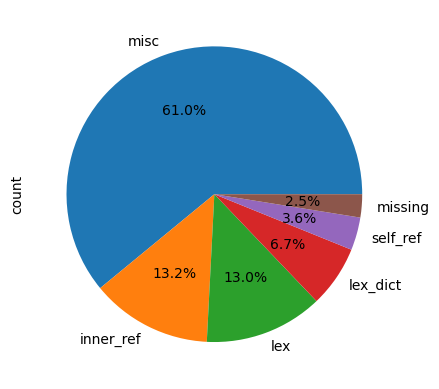

In [8]:
label_counts = footnote_df.label.value_counts()
label_counts.plot(kind="pie", autopct='%1.1f%%')

## Taking only the misc Category from now on

In [9]:
# ignor lex and sel_ref footnotes
footnote_df = footnote_df[footnote_df.label == "misc"]

In [10]:
from collections import defaultdict, Counter
from html import unescape  # from xml.sax.saxutils import unescape ->> does not work properly... :/
import re

lit_counter = defaultdict(int)
for xml_footnote in footnote_df["xml_footnote"]:
    matches = re.findall(r"<bibl.*?>(.*?)</bibl>", xml_footnote)
    for match in matches:
        match = unescape(match)  # take away excape sequences of the xml
        lit_counter[match] += 1

lit_counter = Counter(lit_counter)


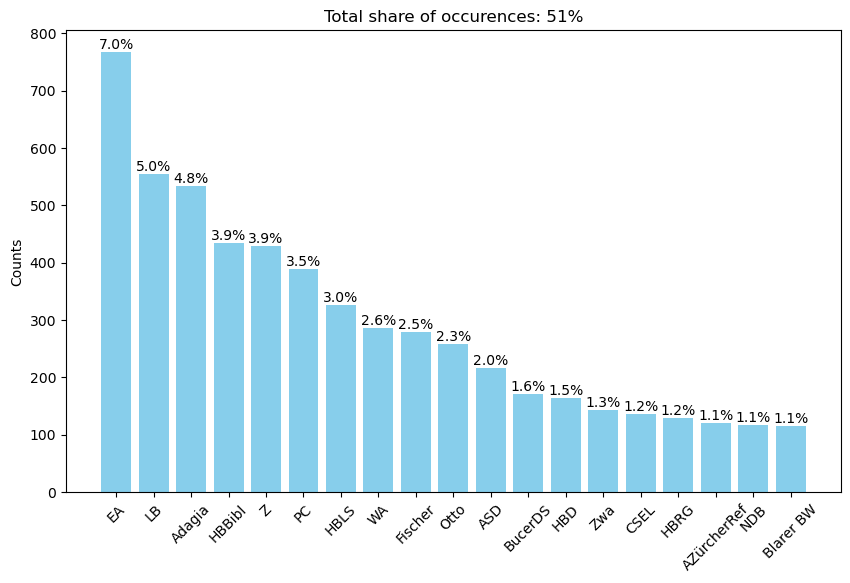

In [11]:
import bullinger_plots
bullinger_plots.bar(lit_counter, 0.50)

In [22]:
[(title, lit_map[title], occ) for title, occ in lit_counter.most_common()[:18]]
# !! kommt zweimal das Erasmus ding vor, mit anderen Kürzeln??
# !! 'Fischer' kommt als kürzel zweimal vor, einmal für Hans fischer, etwas, einmal das Schwäbische Wörterbuch !!!! WTF, whywhywhywhywhywhy


[('EA', 'Amtliche Sammlung der ältern Eidgenössischen Abschiede', 917),
 ('LB', 'Desiderii Erasmi Roterodami opera omnia', 564),
 ('Adagia', 'ASD II/1-9', 538),
 ('Z', 'Huldreich Zwinglis sämtliche Werke', 501),
 ('PC',
  'Politische Correspondenz der Stadt Strassburg im Zeitalter der Reformation',
  446),
 ('HBLS', 'Historisch-biographisches Lexikon der Schweiz', 372),
 ('WA',
  'D. Martin Luthers Werke. Kritische Gesamtausgabe (Weimarer Ausgabe)',
  357),
 ('Fischer',
  'Schwäbisches Wörterbuch aufgrund der von Adelbert v. Keller begonnenen Sammlungen und mit Unterstützung des Württembergischen Staates',
  286),
 ('Otto', 'Die Sprichwörter und sprichwörtlichen Redensarten der Römer', 277),
 ('ASD', 'Opera omnia Desiderii Erasmi Roterodami', 220),
 ('BucerDS',
  'Martin Bucers Deutsche Schriften, im Auftrag der Heidelberger Akademie der Wissenschaften',
  203),
 ('Blarer BW', 'Briefwechsel der Brüder Ambrosius und Thomas Blaurer', 181),
 ('HBD',
  'Heinrich Bullingers Diarium (Annales